In [6]:
import json
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [7]:
with open('../results/statements_scores_by_sentence.json') as file:
    statements_dict = json.load(file)

In [8]:
def logit(scores):
    '''
    scores::list
    Computes logit score for the list of input scores
    '''
    scores = [x for x in scores if isinstance(x, int) or isinstance(x, float)]
    hawk = sum([i for i in scores if i>0 ])
    dove = abs(sum([i for i in scores if i< 0 ]))
    
    logit_scaled = np.log((hawk+0.5)/(dove+0.5))

    return(logit_scaled)

In [9]:
year = []
mean_score = []
sd_score = []
logit_score = []
for key, value in statements_dict.items():
    year.append(key)
    mean_score.append(np.mean([x for x in value if isinstance(x, int) or isinstance(x, float)]))
    sd_score.append(np.std([x for x in value if isinstance(x, int) or isinstance(x, float)]))
    logit_score.append(logit(value))

    
results = pd.DataFrame(list(zip(year, mean_score, sd_score, logit_score)), 
                      columns = ['year', 'mean_score', 'sd_score', 'logit_score'])

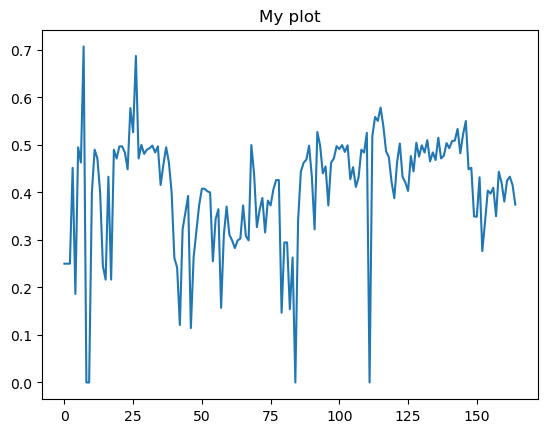

In [10]:
plot = results['sd_score'].plot(kind='line', title="My plot")

In [43]:
# results[['year','mean_score']].to_csv('../results/statement_mean.csv', index=False)
# results[['year','sd_score']].to_csv('../results/statement_sd.csv', index=False)
# results[['year','logit_score']].to_csv('../results/statement_logit.csv', index=False)